<h1>Pandas</h1>

In [1]:
#installing pandas libraries
!pip install pandas-datareader
!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

Requirement already up-to-date: html5lib==1.0b8 in c:\users\angel y vanesa\anaconda3\lib\site-packages (1.0b8)


<h2>Imports</h2>

In [1]:
import pandas as pd #pandas library
#from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook, para que no se habra en otra ventana
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [4]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [5]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(df)

  row_label   A   B   C
0        r1  00  01  02
1        r2  10  11  12
2        r3  20  21  22


In [6]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

2606204315016
2606204315016


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [7]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [8]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [10]:
df.iloc[1]

A    10
B    11
C    12
Name: r2, dtype: object

<h3>Getting multiple columns<h3>

In [11]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [13]:
df.loc['r2','B']

'11'

In [14]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [ ]:
df.loc['r1':'r2']

In [ ]:
df.loc['r1':'r2','B':'C']

<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables from an html page</h4>

Unfortunately, the orginal bloomberg link doesn't work, here we use another website.

In [12]:
#leer datos meteorologicos xml de la pagina AEMET (http://www.aemet.es/es/eltiempo/prediccion/espana?w=23)
from lxml import etree
import xml.etree.cElementTree as et
XA = et.parse("20191020_t_prev_esp.xml")
type(XA)
#for element in parsedXML.iter("ciudad"):
    #print(element.text)
    #print(element.text, element.find("tmax").text)
    #print(element.find().text)
    #print(element.find("ciudad").text,element.find("tmax").text)
root = XA.getroot()
for child in root:
    print(child.tag, child.attrib)

elaborado {}
validez_ini {}
validez_fin {}
ccaa {'id': 'and', 'nombre': 'ANDALUCÍA'}
ccaa {'id': 'arn', 'nombre': 'ARAGÓN'}
ccaa {'id': 'ast', 'nombre': 'PRINCIPADO DE ASTURIAS'}
ccaa {'id': 'bal', 'nombre': 'ILLES BALEARS'}
ccaa {'id': 'coo', 'nombre': 'CANARIAS'}
ccaa {'id': 'can', 'nombre': 'CANTABRIA'}
ccaa {'id': 'cle', 'nombre': 'CASTILLA Y LEÓN'}
ccaa {'id': 'clm', 'nombre': 'CASTILLA - LA MANCHA'}
ccaa {'id': 'cat', 'nombre': 'CATALUÑA'}
ccaa {'id': 'ext', 'nombre': 'EXTREMADURA'}
ccaa {'id': 'gal', 'nombre': 'GALICIA'}
ccaa {'id': 'mad', 'nombre': 'COMUNIDAD DE MADRID'}
ccaa {'id': 'mur', 'nombre': 'REGIÓN DE MURCIA'}
ccaa {'id': 'nav', 'nombre': 'COMUNIDAD FORAL DE NAVARRA'}
ccaa {'id': 'pva', 'nombre': 'PAÍS VASCO'}
ccaa {'id': 'rio', 'nombre': 'LA RIOJA'}
ccaa {'id': 'val', 'nombre': 'COMUNIDAD VALENCIANA'}
ccaa {'id': 'ceu', 'nombre': 'CEUTA'}
ccaa {'id': 'mel', 'nombre': 'MELILLA'}


In [27]:
#import numpy as np
#p=[]
#matriz=[]
#for provincia in root.iter('provincia'):
#   for ciudad in root.iter("ciudad"):
        #print(provincia.attrib.get("nombre"))
        #print(ciudad.attrib.get("nombre"))
        #print(ciudad.find("tmax").text)
        #p=[provincia.attrib.get("nombre"),ciudad.attrib.get("nombre"),tmax.append(ciudad.find("tmax").text)
        #c.append(ciudad.attrib.get("nombre"))
        #tmax.append(ciudad.find("tmax").text)

#pi=np.array(p)
#ci=np.array(c)
#tmaxi=np.array(tmax,float)
#matriz=np.array(pi,ci,tmaxi)
#import pandas as pd
#print(len(pi))
#print(len(ci))
#print(len(tmax))
#print(pi[500])
#print(ci[500])
#print(tmaxi[500])
#TABLA= pd.DataFrame([p,c,tmax],columns=['Provincia','Ciudad','Temp Max'])
#


In [65]:
import numpy as np
c=[]
p=[]
tmax=[]
matriz=[]
for provincia in root.findall('ccaa/provincia'):
    p.append(provincia.attrib.get("nombre"))
    for ciudad in root.iter("ciudad"):
        c.append(ciudad.attrib.get("nombre"))
        tmax.append(ciudad.find("tmax").text)
        b=[c[-1],tmax[-1]]
        matriz.append(b)
res = pd.DataFrame(matriz,columns=['Ciudad','Temperatura Máxima'])
res.set_index('Ciudad',inplace=True)
print(p)
res

['HUELVA', 'CÁDIZ', 'CÓRDOBA', 'SEVILLA', 'GRANADA', 'JAÉN', 'ALMERÍA', 'MÁLAGA', 'HUESCA', 'TERUEL', 'ZARAGOZA', 'ASTURIAS', 'Illes Balears (Menorca)', 'Illes Balears (Mallorca)', 'Illes Balears (Ibiza-Formentera)', 'Las Palmas (Lanzarote)', 'Las Palmas (Fuerteventura)', 'Las Palmas (Gran Canaria)', 'Santa Cruz de Tenerife (Tenerife)', 'Santa Cruz de Tenerife (La Gomera)', 'Santa Cruz de Tenerife (La Palma)', 'Santa Cruz de Tenerife (El Hierro)', 'CANTABRIA', 'LEÓN', 'PALENCIA', 'BURGOS', 'VALLADOLID', 'SORIA', 'ZAMORA', 'ÁVILA', 'SEGOVIA', 'SALAMANCA', 'ALBACETE', 'CUENCA', 'GUADALAJARA', 'CIUDAD REAL', 'TOLEDO', 'GIRONA', 'LLEIDA', 'TARRAGONA', 'BARCELONA', 'BADAJOZ', 'CÁCERES', 'PONTEVEDRA', 'A CORUÑA', 'LUGO', 'OURENSE', 'MADRID', 'MURCIA', 'NAVARRA', 'ARABA/ÁLAVA', 'GIPUZKOA', 'BIZKAIA', 'LA RIOJA', 'CASTELLÓ/CASTELLÓN', 'VALÈNCIA/VALENCIA', 'ALACANT/ALICANTE', 'CEUTA', 'MELILLA']


,Temperatura Máxima
Ciudad,
Almonte,19
Isla Cristina,21
Valverde del Camino,17
Huelva,20
Algeciras,22
Cádiz,22
Jerez de la Frontera,21
Pozoblanco,16
Priego de Córdoba,16


In [56]:
print(len(p))

59


In [67]:
#res.loc['Cadiz']['Temperatura Máxima']
res.loc['Melilla']

,Temperatura Máxima
Ciudad,
Melilla,24
Melilla,24
Melilla,24
Melilla,24
Melilla,24
Melilla,24
Melilla,24
Melilla,24
Melilla,24


In [94]:
af_list= pd.read_html('https://es.inflation.eu/tasas-de-inflacion/espana/inflacion-historica/ipc-inflacion-espana-2018.aspx')
#for item in af_list:
#    print(item)
ax=af_list[10]
#ax.set_index('inflación mensual',inplace=True)
print(ax)

KeyError: 'inflación mensual'

In [15]:
df_list = pd.read_html('https://www.x-rates.com/table/?from=USD&amount=1')
#Se mete una lista de tablas en df_list, luego hay que ir extrayendo tablas con df_list[0], df_list[1]
print(len(df_list))

2


<h4>The page contains two tables</h4>

In [11]:
df = df_list[0]
print(df)

               US Dollar    1.00 USD  inv. 1.00 USD
0                   Euro    0.898524       1.112936
1          British Pound    0.777569       1.286059
2           Indian Rupee   71.121327       0.014060
3      Australian Dollar    1.464791       0.682691
4        Canadian Dollar    1.313423       0.761369
5       Singapore Dollar    1.364830       0.732692
6            Swiss Franc    0.987167       1.013000
7      Malaysian Ringgit    4.181933       0.239124
8           Japanese Yen  108.535711       0.009214
9  Chinese Yuan Renminbi    7.076424       0.141314


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [12]:
df.set_index('US Dollar',inplace=True)
print(df)

                         1.00 USD  inv. 1.00 USD
US Dollar                                       
Euro                     0.898524       1.112936
British Pound            0.777569       1.286059
Indian Rupee            71.121327       0.014060
Australian Dollar        1.464791       0.682691
Canadian Dollar          1.313423       0.761369
Singapore Dollar         1.364830       0.732692
Swiss Franc              0.987167       1.013000
Malaysian Ringgit        4.181933       0.239124
Japanese Yen           108.535711       0.009214
Chinese Yuan Renminbi    7.076424       0.141314


<h4>Now we can use .loc to extract specific currency rates</h4>

In [13]:
df.loc['Euro','1.00 USD']

0.898524

In [14]:
df.loc['Swiss Franc','1.00 USD']

0.987167

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [15]:
eur_usd = df.loc['Euro']['1.00 USD'] #This is chained indexing
df.loc['Euro']['1.00 USD'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['Euro']['1.00 USD']) #Neither eur_usd, nor the dataframe are changed

0.898524
1.0


In [16]:
eur_usd = df.loc['Euro','1.00 USD'] #eur_usd points to the value inside the dataframe
df.loc['Euro','1.00 USD'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['Euro']['1.00 USD']) #The dataframe has been correctly updated

1.0
1.0


<h2>Getting historical stock prices from Yahoo financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Google finance datareader has stopped working because of the charge of Google's policy


In [96]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'yahoo', start, end)


2017-01-01 00:00:00 2019-10-20 08:11:54.970772


In [18]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,148.670532
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,150.511230
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,150.013260
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,150.751312
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,149.079559
2017-01-10,168.089996,165.339996,167.979996,165.520004,4118700.0,147.185501
2017-01-11,167.759995,165.600006,166.050003,167.750000,3599500.0,149.168472
2017-01-12,168.009995,165.559998,167.770004,167.949997,2927500.0,149.346359
2017-01-13,168.479996,166.880005,167.970001,167.339996,2875400.0,148.803894


In [98]:
#Otro ejemplo es importar de MOEX (https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-moex
#Moscow Exchange (MOEX)
af = data.DataReader('USD000UTSTOM', 'moex', start='2017-07-01', end='2017-07-31')
af

,BOARDID,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2017-07-03,CNGD,USDRUB_TOM,USD000UTSTOM,58.9800,58.8400,59.4250,59.3600,24,1.864785e+09,NaN
2017-07-04,CETS,USDRUB_TOM,USD000UTSTOM,59.3000,59.1350,59.4575,59.4125,21053,1.090265e+11,59.2700
2017-07-04,CNGD,USDRUB_TOM,USD000UTSTOM,59.3600,58.9300,59.3600,59.3575,37,1.046416e+09,NaN
2017-07-05,CETS,USDRUB_TOM,USD000UTSTOM,59.3000,59.3000,60.2600,59.9825,50108,2.874226e+11,59.9234
2017-07-05,CNGD,USDRUB_TOM,USD000UTSTOM,59.3400,59.2650,60.1800,60.1800,35,6.339036e+09,NaN
2017-07-06,CETS,USDRUB_TOM,USD000UTSTOM,60.1025,59.7500,60.4350,60.1600,43929,2.404461e+11,60.0714
2017-07-06,CNGD,USDRUB_TOM,USD000UTSTOM,60.0700,59.4125,60.3700,59.8650,26,4.031391e+09,NaN
2017-07-07,CETS,USDRUB_TOM,USD000UTSTOM,60.4000,60.2125,60.6250,60.3550,45691,2.561535e+11,60.4281
2017-07-07,CNGD,USDRUB_TOM,USD000UTSTOM,60.4522,59.9825,60.5700,60.5200,29,4.335937e+09,NaN


In [101]:
#Ejemplo EUROESTAT
bf=data.DataReader('tran_sf_railac', 'eurostat',start='2010-10-1', end='2018-12-31')
bf

ACCIDENT    Collisions of trains, including collisions with obstacles within the clearance gauge  \
UNIT                                                                                      Number   
GEO                                                                                      Austria   
FREQ                                                                                      Annual   
TIME_PERIOD                                                                                        
2011-01-01                                                 2.0                                     
2012-01-01                                                 1.0                                     
2013-01-01                                                 4.0                                     
2014-01-01                                                 1.0                                     
2015-01-01                                                 7.0                                     
2016-01-01                                                 7.0                                     
2017-01-01                                                 7.0                                     

ACCIDENT                                                         \
UNIT                                                              
GEO         Belgium Bulgaria Switzerland Channel Tunnel Czechia   
FREQ         Annual   Annual      Annual         Annual  Annual   
TIME_PERIOD                                                       
2011-01-01      0.0      0.0         4.0            0.0     6.0   
2012-01-01      3.0      3.0         4.0            0.0     6.0   
2013-01-01      1.0      2.0         6.0            0.0     5.0   
2014-01-01      3.0      4.0         0.0            0.0    13.0   
2015-01-01      0.0      3.0         3.0            0.0    14.0   
2016-01-01      2.0      3.0         2.0            0.0     6.0   
2017-01-01      1.0      1.0         3.0            0.0    11.0   

ACCIDENT                                                                      \
UNIT                                                                           
GEO         Germany (until 1990 former territory of the FRG) Denmark Estonia   
FREQ                                                  Annual  Annual  Annual   
TIME_PERIOD                                                                    
2011-01-01                                              18.0     1.0     0.0   
2012-01-01                                              23.0     1.0     3.0   
2013-01-01                                              29.0     0.0     0.0   
2014-01-01                                              32.0     0.0     0.0   
2015-01-01                                              40.0     3.0     0.0   
2016-01-01                                              29.0     0.0     3.0   
2017-01-01                                              38.0     2.0     4.0   

ACCIDENT            ...     Unknown                                        \
UNIT                ...      Number                                         
GEO         Greece  ... Netherlands Norway Poland Portugal Romania Sweden   
FREQ        Annual  ...      Annual Annual Annual   Annual  Annual Annual   
TIME_PERIOD         ...                                                     
2011-01-01     1.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2012-01-01     2.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2013-01-01     2.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2014-01-01     1.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2015-01-01     2.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2016-01-01     1.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   
2017-01-01     1.0  ...         NaN    NaN    NaN      NaN     NaN    NaN   

ACCIDENT                                             
UNIT                                                 


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [19]:
#Se crea la columna UP y se le dan valores como un bucle If de excel (en este caso Where)
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,High,Low,Open,Close,Volume,Adj Close,UP
Date,,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,148.670532,1
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,150.511230,1
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,150.013260,0
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,150.751312,1
2017-01-09,169.800003,167.619995,169.470001,167.649994,3189900.0,149.079559,0
2017-01-10,168.089996,165.339996,167.979996,165.520004,4118700.0,147.185501,0
2017-01-11,167.759995,165.600006,166.050003,167.750000,3599500.0,149.168472,1
2017-01-12,168.009995,165.559998,167.770004,167.949997,2927500.0,149.346359,1
2017-01-13,168.479996,166.880005,167.970001,167.339996,2875400.0,148.803894,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [21]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,UP
count,703.000000,703.000000,703.000000,703.000000,7.030000e+02,703.000000,703.000000
mean,148.030882,146.002845,147.056757,146.990797,4.559435e+06,138.187753,0.465149
std,14.130374,14.250338,14.201034,14.188821,2.846163e+06,10.404468,0.499139
min,111.000000,105.940002,108.000000,107.570000,1.193000e+06,103.859131,0.000000
25%,140.490005,138.809998,139.684998,139.635002,3.093450e+06,133.561287,0.000000
50%,146.460007,144.750000,145.660004,145.649994,3.789900e+06,138.127365,0.000000
75%,154.839996,153.055000,154.075005,153.880005,5.020400e+06,143.049316,1.000000
max,182.789993,180.919998,182.000000,181.949997,3.049020e+07,163.074905,1.000000


In [102]:
af.describe()

,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
count,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01,20.000000
mean,59.691520,59.403841,59.995566,59.719827,17098.707317,9.653594e+10,59.743065
std,0.503024,0.460618,0.535209,0.518392,18527.582075,1.018613e+11,0.516174
min,58.955000,58.772500,59.010000,58.935000,17.000000,3.645832e+08,58.984800
25%,59.300000,58.962500,59.457500,59.327500,24.000000,2.500785e+09,59.257900
50%,59.640000,59.360000,60.062500,59.780000,37.000000,1.463208e+10,59.851100
75%,60.097500,59.750000,60.370000,60.100000,34170.000000,1.884092e+11,60.071650
max,60.652500,60.290000,60.990000,60.790000,50108.000000,2.874226e+11,60.775100


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [ ]:
df['UP'].sum()/df['UP'].count()

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [ ]:
df['Close'].pct_change() #One timeperiod percent change

In [ ]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [ ]:
n=13
df['Close'].pct_change(n).mean()

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [ ]:
df['Close'].pct_change(n).rolling(21)

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [ ]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

<h4>Calculate several moving averages and graph them</h4>

In [ ]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

In [ ]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, SPWR are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [105]:
# Please Note that the historical data of SCTY is not completed so we remove this stock from the list. 
# Change SCTY to SPWR
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','RGSE','SPWR'],'yahoo', start=start,end=end)['Close']

In [23]:
solar_df

Symbols,FSLR,RGSE,SPWR,TAN
Date,,,,
2015-07-01,46.040001,1128.0,27.900000,38.840000
2015-07-02,45.169998,1200.0,27.490000,38.549999
2015-07-06,44.189999,1008.0,26.830000,36.369999
2015-07-07,45.119999,984.0,26.990000,36.099998
2015-07-08,43.270000,852.0,26.020000,33.669998
2015-07-09,43.650002,876.0,25.980000,35.230000
2015-07-10,44.029999,942.0,26.290001,36.490002
2015-07-13,46.009998,978.0,26.980000,37.369999
2015-07-14,45.810001,906.0,28.030001,37.860001


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [106]:
rets = solar_df.pct_change()
print(rets)

Symbols         FSLR      RGSE      SPWR       TAN
Date                                              
2015-07-01       NaN       NaN       NaN       NaN
2015-07-02 -0.018897  0.063830 -0.014695 -0.007467
2015-07-06 -0.021696 -0.160000 -0.024009 -0.056550
2015-07-07  0.021045 -0.023810  0.005963 -0.007424
2015-07-08 -0.041002 -0.134146 -0.035939 -0.067313
2015-07-09  0.008782  0.028169 -0.001537  0.046332
2015-07-10  0.008706  0.075342  0.011932  0.035765
2015-07-13  0.044969  0.038217  0.026246  0.024116
2015-07-14 -0.004347 -0.073620  0.038918  0.013112
2015-07-15 -0.028815 -0.019868 -0.030681 -0.021130
2015-07-16  0.006069  0.006757 -0.005889  0.012142
2015-07-17 -0.018096  0.006711 -0.010737 -0.000800
2015-07-20 -0.015245 -0.053333 -0.014970  0.004803
2015-07-21  0.004621  0.049296 -0.012918 -0.015932
2015-07-22 -0.022539  0.033557 -0.011547 -0.011873
2015-07-23  0.005647 -0.025974 -0.001947 -0.020207
2015-07-24  0.005381  0.046667 -0.007023 -0.011427
2015-07-27 -0.016290  0.025478 

<h4>Let's visualize the relationship between each stock and the ETF</h4>

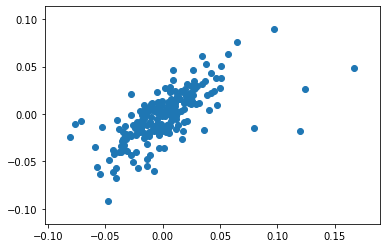

In [107]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

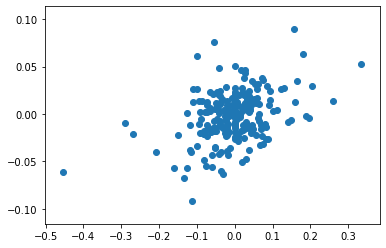

In [108]:
plt.scatter(rets.RGSE,rets.TAN)

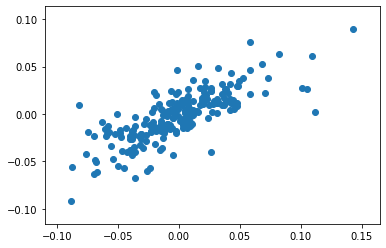

In [109]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [110]:
solar_corr = rets.corr()
print(solar_corr)

Symbols      FSLR      RGSE      SPWR       TAN
Symbols                                        
FSLR     1.000000  0.248351  0.656033  0.670287
RGSE     0.248351  1.000000  0.314611  0.386003
SPWR     0.656033  0.314611  1.000000  0.773042
TAN      0.670287  0.386003  0.773042  1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

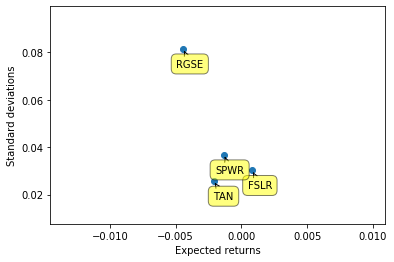

In [111]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [112]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','SPWR']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

C:\Users\Angel y Vanesa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.79e-136
Time:                        08:39:47   Log-Likelihood:                -364.86
No. Observations:                 232   AIC:                             737.7
Df Residuals:                     228   BIC:                             751.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0926      0.759     19.887      0.0

<h4>Finally plot the fitted line with the actual y values

C:\Users\Angel y Vanesa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


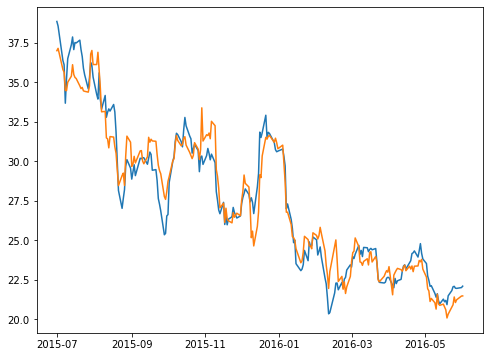

In [113]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)